In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame

import tensorflow as tf

Start with the simple network: a neural network is trained to use input to predict output

In [6]:
import pandas as pd
from pandas import DataFrame

data1 = {'Input x':[0 , 0 , 1 , 1 ],
       'Input y':[0 , 1 , 0 , 1 ], 'Target Value':[ 0 ,  1 ,  1 ,  0 ] }
df1 = pd.DataFrame(data1, columns=['Input x','Input y', 'Target Value'])

df1

,Input x,Input y,Target Value
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
d = {'Input x' : [0 , 0 , 1 , 1 ],
     'Input y' : [0 , 1 , 0 , 1 ]}

df = pd.DataFrame(d)

df.plot(style=['o','rx'])


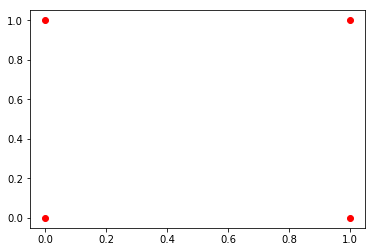

In [103]:
plt.plot(*zip(*x), marker='o', color='r', ls='')
plt.show()

plt.plot([0,0,1,1],[0,1,0,1],'ro')
plt.show()

How to draw neural network diagram in python:
<br>
http://www.astroml.org/book_figures/appendix/fig_neural_network.html#

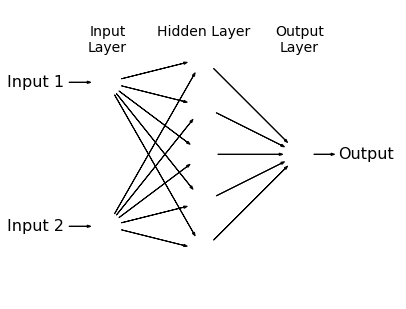

In [78]:
from matplotlib import pyplot as plt

fig = plt.figure(facecolor='w')
ax = fig.add_axes([0, 0, 1, 1],
                  xticks=[], yticks=[])
plt.box(False)
circ = plt.Circle((1, 1), 2)

radius = 0.3

arrow_kwargs = dict(head_width=0.05, fc='black')


# function to draw arrows
def draw_connecting_arrow(ax, circ1, rad1, circ2, rad2):
    theta = np.arctan2(circ2[1] - circ1[1],
                       circ2[0] - circ1[0])

    starting_point = (circ1[0] + rad1 * np.cos(theta),
                      circ1[1] + rad1 * np.sin(theta))

    length = (circ2[0] - circ1[0] - (rad1 + 1.4 * rad2) * np.cos(theta),
              circ2[1] - circ1[1] - (rad1 + 1.4 * rad2) * np.sin(theta))

    ax.arrow(starting_point[0], starting_point[1],
             length[0], length[1], **arrow_kwargs)


# function to draw circles
def draw_circle(ax, center, radius):
    circ = plt.Circle(center, radius, fc='none', lw=2)
    ax.add_patch(circ)

x1 = -2
x2 = 0
x3 = 2
y3 = 0

#------------------------------------------------------------
# draw circles
for i, y1 in enumerate(np.linspace(1.5, -1.5, 2)):
    draw_circle(ax, (x1, y1), radius)
    ax.text(x1 - 0.9, y1, 'Input %i' % (i + 1),
            ha='right', va='center', fontsize=16)
    draw_connecting_arrow(ax, (x1 - 0.9, y1), 0.1, (x1, y1), radius)

for y2 in np.linspace(-2, 2, 5):
    draw_circle(ax, (x2, y2), radius)

draw_circle(ax, (x3, y3), radius)
ax.text(x3 + 0.8, y3, 'Output', ha='left', va='center', fontsize=16)
draw_connecting_arrow(ax, (x3, y3), radius, (x3 + 0.8, y3), 0.1)

#------------------------------------------------------------
# draw connecting arrows
for y1 in np.linspace(-1.5, 1.5, 2):
    for y2 in np.linspace(-2, 2, 5):
        draw_connecting_arrow(ax, (x1, y1), radius, (x2, y2), radius)

for y2 in np.linspace(-2, 2, 5):
    draw_connecting_arrow(ax, (x2, y2), radius, (x3, y3), radius)

#------------------------------------------------------------
# Add text labels
plt.text(x1, 2.7, "Input\nLayer", ha='center', va='top', fontsize=14)
plt.text(x2, 2.7, "Hidden Layer", ha='center', va='top', fontsize=14)
plt.text(x3, 2.7, "Output\nLayer", ha='center', va='top', fontsize=14)

ax.set_aspect('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

To see the flow of the training process, click on the following link:
<br>
http://www.mind.ilstu.edu/curriculum/artificial_neural_net/xor_problem_and_solution.php

Activation Functions:

1) linear $y = x$ 
<br>
2) Sigmoid(logistic) $y = \frac{1}{1+e^{-x}}$ 
<br>
3) Hyperbolic tangent $y = \frac{1-e^{-2x}}{1+e^{2x}}$ 
<br>
4) ReLU Function:



,where x is the input to a neuron.

Sigmoind units for bernoulli output distributions (since XOR gives binary output), there are two ways:

1) Forward propagation:
<br>
- The input layer contains two neurons which is given by the X matrix, calculating the forward propagation by multipling:
$$Z_1 = X*w_1 + b1$$
$$\text{Output_H} = \sigma(Z_1)$$
$$Z_2 = X*w_2 + b2$$
$$\text{Output_O} = \sigma(Z_2)$$

where $\sigma()$ is the activation function.

- To test the accuracy the network's outputThe error function:
<br>
error = Output_o - y



2)Back propagation with Sigmoid function :

- First we create the network with random weights and random biases
- Activate two input nodes and run network forward
- Find the error between the predict output and actual output
- Pass the error back to hidden layer, change the biases and weights
- The cycle repeats with new inputs and outputs

The network training stops until the average error approaches 0.

Take the Sigmoid function as example:
<br>
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
<br>
Derivative of sigmoid function $$\sigma^{'}(z) = \sigma(z)(1-\sigma(z))$$

To compute the deltas of the weights and biases:
$$\delta(Z_2) = \delta(x)\cdot \sigma^{'}(Z_2)$$

# 1) Linear model
I expected that the linear model will return output about 0.5, which is not good for training: 

In [3]:
def linear(x,deriv=False):
    if(deriv==True):
        return 2         #derivative of Sigmoid function
    return 2*x

epochs = 1000000
n_input,n_hidden,n_output = 2,5,1
    
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


def BackPropagation(n_input, n_hidden, n_output, epochs):
    
    weight_h = np.random.uniform(size=(n_input,n_hidden))
    weight_o = np.random.uniform(size=(n_hidden, n_output))
    
    for i in range(epochs):
        Hidden = linear(np.dot(x,weight_h))
        Output = linear(np.dot(Hidden,weight_o))
        error = y - Output
        
        delta_o = error * linear(Output,deriv = True)
        delta_h = np.dot(delta_o, weight_o.T) * linear(Hidden, deriv = True)
        
        weight_h += np.dot(x.T, delta_h)
        weight_o += np.dot(Hidden.T, delta_o)
    return Output

print("Fix 10000 epochs, increase hidden layers:")
print("n_hidden = 1: ")
print(BackPropagation(2,1,1,10000))
print("n_hidden = 2: ")
print(BackPropagation(2,2,1,10000))
print("n_hidden = 3: ")
print(BackPropagation(2,3,1,10000))
print("n_hidden = 4: ")
print(BackPropagation(2,4,1,10000))
print("n_hidden = 5: ")
print(BackPropagation(2,5,1,10000))


print("------------------------------------")
print("Fix 5 hidden layers, increase epochs")
print("epochs = 1000 ")
print(BackPropagation(2,5,1,1000))
print("epochs = 10000")
print(BackPropagation(2,5,1,10000))
print("epochs = 100000")
print(BackPropagation(2,5,1,100000))
print("epochs = 1000000")
print(BackPropagation(2,5,1,1000000))

Fix 10000 epochs, increase hidden layers:
n_hidden = 1: 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
n_hidden = 2: 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
n_hidden = 3: 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
n_hidden = 4: 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
n_hidden = 5: 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
------------------------------------
Fix 5 hidden layers, increase epochs
epochs = 1000 
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
epochs = 10000
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
epochs = 100000
[[ nan]
 [ nan]
 [ nan]
 [ nan]]
epochs = 1000000
[[ nan]
 [ nan]
 [ nan]
 [ nan]]


I got non after I re-run the code. First time I got like : The linear model simply outputs 0.5 everywhere, so a linear model is not able to represent the XOR function.

--------------------------------------------------------------------------

# 2) Non-linear activation function:
<br>
Use logistic function as benchmark

In [6]:
def Sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)         #derivative of Sigmoid function
    return 1/(1 + np.exp(-x))

epochs = 1000000

#here is just one layer with n number of neurons
n_input,n_hidden,n_output = 2,5,1
    
X = np.array([[0,0],[0,1.0],[1.0,0],[1,1.0]], dtype=float)
Y = np.array([[0],[1.0],[1.0],[0]], dtype=float)

Output = 0

def BackProp_Sigmoid(n_input, n_hidden, n_output, epochs):
    
    weight_h = np.random.uniform(size=(n_input,n_hidden))
    weight_o = np.random.uniform(size=(n_hidden, n_output))
    
    for i in range(epochs):
        
        global Output
        Hidden = Sigmoid(np.dot(X,weight_h))
        Output = Sigmoid(np.dot(Hidden,weight_o))
        error = Y - Output
        
        delta_o = error * Sigmoid(Output,deriv = True)
        delta_h = np.dot(delta_o, weight_o.T) * Sigmoid(Hidden, deriv = True)
        
        weight_h += np.dot(X.T, delta_h)
        weight_o += np.dot(Hidden.T, delta_o)
        
    return Output

print("Fix 10000 epochs, increase hidden layers:")
print("n_hidden = ")
print(BackProp_Sigmoid(2,1,1,10000))
print("n_hidden = 2: ")
print(BackProp_Sigmoid(2,2,1,10000))
print("n_hidden = 3: ")
print(BackProp_Sigmoid(2,3,1,10000))
print("n_hidden = 4: ")
print(BackProp_Sigmoid(2,4,1,10000))
print("n_hidden = 5: ")
print(BackProp_Sigmoid(2,5,1,10000))


print("------------------------------------")
print("Fix 5 hidden layers, increase epochs")
print("epochs = 1000 ")
print(BackProp_Sigmoid(2,5,1,1000))
print("epochs = 10000")
print(BackProp_Sigmoid(2,5,1,10000))
print("epochs = 100000")
print(BackProp_Sigmoid(2,5,1,100000))
print("epochs = 1000000")
print(BackProp_Sigmoid(2,5,1,1000000))


Fix 10000 epochs, increase hidden layers:
n_hidden = 
[[ 0.53756821]
 [ 0.57443952]
 [ 0.57443862]
 [ 0.57471358]]
n_hidden = 2: 
[[ 0.03274452]
 [ 0.93086249]
 [ 0.9308625 ]
 [ 0.09219216]]
n_hidden = 3: 
[[ 0.03209401]
 [ 0.98041367]
 [ 0.98041702]
 [ 0.00665369]]
n_hidden = 4: 
[[ 0.02446928]
 [ 0.98185474]
 [ 0.98130731]
 [ 0.01371072]]
n_hidden = 5: 
[[ 0.02470448]
 [ 0.98307642]
 [ 0.98308463]
 [ 0.00877622]]
------------------------------------
Fix 5 hidden layers, increase epochs
epochs = 1000 
[[ 0.09892881]
 [ 0.92183156]
 [ 0.91518065]
 [ 0.06968598]]
epochs = 10000
[[ 0.01899429]
 [ 0.98422286]
 [ 0.98273518]
 [ 0.0146243 ]]
epochs = 100000
[[ 0.00499525]
 [ 0.99529417]
 [ 0.99589157]
 [ 0.00443998]]
epochs = 1000000
[[ 0.00124755]
 [ 0.99852061]
 [ 0.99865851]
 [ 0.00138998]]


Here we use one hidden layer but multiple neurons within that hidden layer.
<br>
With the sigmoid function as activation function, we can see the results are improving when:
- Increase the number of hidden neurons while fix the number of epochs
- Increase the number of epochs while fix the number of hidden neurons
    

I wanted to plot the graph show the spread of the prediction points, so I got the following graph (not exactly what I want but it shows the movement somehow). 

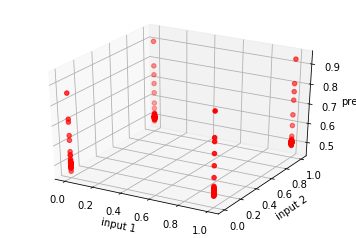

In [101]:
from mpl_toolkits.mplot3d import Axes3D

Sigmoid_Total = []
X = np.array([[0,0],[0,1],[1,0],[1,1]])
xx_S, yy_S = X.T
xx_total = []
yy_total = []

for i in range(100):
    
    Sigmoid_Total.append(BackProp_Sigmoid(2,5,1,i))
    xx_total.append(xx_S)
    yy_total.append(yy_S)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#image = plt.imshow(Sigmoid_Total, interpolation='none')
                       #extent = [0, 1.0, 0, 1.0])
                       #aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

ax.scatter(xx_total, yy_total, Sigmoid_Total, c='r', marker='o')
ax.set_xlabel('input 1')
ax.set_ylabel('input 2')
ax.set_zlabel('pred')
      
#plt.scatter(xx_total, yy_total, Sigmoid_Total)
#plt.colorbar()
plt.show() 

In [5]:
#from mpl_toolkits.mplot3d import Axes3D

Sigmoid_Total1 = []
Sigmoid_Total2 = []
Sigmoid_Total3 = []
Sigmoid_Total4 = []
Sigmoid_Total5 = []
X = np.array([[0,0],[0,1],[1,0],[1,1]])
xx_S, yy_S = X.T
xx_total = []
yy_total = []

for j in range(1000):
    
    Sigmoid_Total1.append(BackProp_Sigmoid(2,5,1,j))
    xx_total.append(xx_S)
    yy_total.append(yy_S)

for k in range(1000, 5000):
    
    Sigmoid_Total2.append(BackProp_Sigmoid(2,5,1,k))
    xx_total.append(xx_S)
    yy_total.append(yy_S)

for l in range(5000,10000):
    
    Sigmoid_Total3.append(BackProp_Sigmoid(2,5,1,l))
    xx_total.append(xx_S)
    yy_total.append(yy_S)
    
for m in range(10000, 15000):
    
    Sigmoid_Total4.append(BackProp_Sigmoid(2,5,1,m))
    xx_total.append(xx_S)
    yy_total.append(yy_S)
    
for n in range(15000, 20000):
    
    Sigmoid_Total5.append(BackProp_Sigmoid(2,5,1,n))
    xx_total.append(xx_S)
    yy_total.append(yy_S)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#image = plt.imshow(Sigmoid_Total, interpolation='none')
                       #extent = [0, 1.0, 0, 1.0])
                       #aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

ax.scatter(xx_total, yy_total, Sigmoid_Total1, c='red', marker='o')
ax.scatter(xx_total, yy_total, Sigmoid_Total2, c='blue', marker='o')
ax.scatter(xx_total, yy_total, Sigmoid_Total3, c='green', marker='o')
ax.scatter(xx_total, yy_total, Sigmoid_Total4, c='purple', marker='o')
ax.scatter(xx_total, yy_total, Sigmoid_Total5, c='black', marker='o')
ax.set_xlabel('input 1')
ax.set_ylabel('input 2')
ax.set_zlabel('pred')
      
#plt.scatter(xx_total, yy_total, Sigmoid_Total)
#plt.colorbar()
plt.show() 

ValueError: Unknown projection '3d'

--------------------------------------------------------------------------

4) ReLU(rectifier) function:
http://mochajl.readthedocs.io/en/latest/user-guide/neuron.html

$f(x) = \max(0,x)$

The pointwise derivative of ReLU is 
$ \frac{dy}{dx} =
  \begin{cases}
    1      & \quad x > \epsilon \\
    0      & \quad x \leq \epsilon \\
  \end{cases} $

Specifies the minimum threshold at which the neuron will truncate. Default 0.

Leaky Rectified Linear Unit. A Leaky ReLU can help fix the “dying ReLU” problem. ReLU’s can “die” if a large enough gradient changes the weights such that the neuron never activates on new data.

$ \frac{dy}{dx} =
  \begin{cases}
    1      & \quad x > 0 \\
    0.01      & \quad x \leq 0 \\
  \end{cases} $

https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks


In [8]:
def ReLU(x):
    #if(deriv==True):
        #if (x > 0):
            #return 0
        #if (x <=0):
            #return 1        #derivative of ReLU function
    return np.maximum(x, 0)

def ReLU_deriv(x):
    if np.all(x > 0):
        x = 1
    if np.all(x <= 0):
        x = 0.05 
    return x

epochs = 1000000

#here is just one layer with n number of neurons
n_input,n_hidden,n_output = 2,5,1
    
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])


def BackProp_ReLU(n_input, n_hidden, n_output, epochs):
    
    weight_h = np.random.uniform(size=(n_input,n_hidden))
    weight_o = np.random.uniform(size=(n_hidden, n_output))
    
    for i in range(epochs):
        Hidden = ReLU(np.dot(X,weight_h))
        Output = ReLU(np.dot(Hidden,weight_o))
        error = Y - Output
        
        delta_o = error * ReLU_deriv(Output)
        delta_h = np.dot(delta_o, weight_o.T) * ReLU_deriv(Hidden)
        
        weight_h += np.dot(X.T, delta_h)
        weight_o += np.dot(Hidden.T, delta_o)
    return Output

print("Fix 10000 epochs, increase hidden layers:")
print("n_hidden = 1: ")
print(BackProp_ReLU(2,1,1,10000))
print("n_hidden = 2: ")
print(BackProp_ReLU(2,2,1,10000))
print("n_hidden = 3: ")
print(BackProp_ReLU(2,3,1,10000))
print("n_hidden = 4: ")
print(BackProp_ReLU(2,4,1,10000))
print("n_hidden = 5: ")
print(BackProp_ReLU(2,5,1,10000))


print("------------------------------------")
print("Fix 5 hidden layers, increase epochs")
print("epochs = 1000 ")
print(BackProp_ReLU(2,5,1,1000))
print("epochs = 10000")
print(BackProp_ReLU(2,5,1,10000))
print("epochs = 100000")
print(BackProp_ReLU(2,5,1,100000))
print("epochs = 1000000")
print(BackProp_ReLU(2,5,1,1000000))

Fix 10000 epochs, increase hidden layers:
n_hidden = 1: 
[[ 0.        ]
 [ 0.99999969]
 [ 0.        ]
 [ 0.00674731]]
n_hidden = 2: 
[[  0.00000000e+00]
 [  0.00000000e+00]
 [  9.99999978e-01]
 [  5.77364948e-04]]
n_hidden = 3: 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
n_hidden = 4: 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
n_hidden = 5: 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
------------------------------------
Fix 5 hidden layers, increase epochs
epochs = 1000 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
epochs = 10000
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
epochs = 100000
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
epochs = 1000000
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


Not sure if this works correctly: 
<br>
I expected the prediction would be improved with the ReLU activation function, for some values that we do get like 0.99999969 really closed to 1, but using ReLU function is not that stable.

In [9]:
image = plt.imshow(train_step, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(x_, y_, train_step, levels=[0], linewidths=2,
                           linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title("%s\n Log-Marginal-Likelihood:%.3f"
              % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
              fontsize=12)

plt.tight_layout()
plt.show()

IndentationError: unexpected indent (<ipython-input-9-5dd2a76dea4d>, line 4)

In [11]:
def Hyperbolic(x,deriv=False):
    if(deriv==True):
        return 1 - (np.tanh(x))**2
    return np.tanh(x)

epochs = 1000000
n_input,n_hidden,n_output = 2,5,1
    
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])


def BackProp_Hyperbolic(n_input, n_hidden, n_output, epochs):
    
    weight_h = np.random.uniform(size=(n_input,n_hidden))
    weight_o = np.random.uniform(size=(n_hidden, n_output))
    
    for i in range(epochs):
        Hidden = Hyperbolic(np.dot(X,weight_h))
        Output = Hyperbolic(np.dot(Hidden,weight_o))
        error = Y - Output
        
        delta_o = error * Hyperbolic(Output,deriv = True)
        delta_h = np.dot(delta_o, weight_o.T) * Hyperbolic(Hidden, deriv = True)
        
        weight_h += np.dot(X.T, delta_h)
        weight_o += np.dot(Hidden.T, delta_o)
    return Output

print("Fix 10000 epochs, increase hidden layers:")

for i in range (5):
    print("n_hidden = i:")
    print(BackProp_Hyperbolic(2,i,1,10000))

#print("n_hidden = 1: ")
#print(BackProp_Hyperbolic(2,1,1,10000))
#print("n_hidden = 2: ")
#print(BackProp_Hyperbolic(2,2,1,10000))
#print("n_hidden = 3: ")
#print(BackProp_Hyperbolic(2,3,1,10000))
#print("n_hidden = 4: ")
#print(BackProp_Hyperbolic(2,4,1,10000))
#print("n_hidden = 5: ")
#print(BackProp_Hyperbolic(2,5,1,10000))


#print("------------------------------------")
#print("Fix 5 hidden layers, increase epochs")
#print("epochs = 1000 ")
#print(BackProp_Hyperbolic(2,5,1,1000))
#print("epochs = 10000")
#print(BackProp_Hyperbolic(2,5,1,10000))
#print("epochs = 100000")
#print(BackProp_Hyperbolic(2,5,1,100000))
#print("epochs = 1000000")
#print(BackProp_Hyperbolic(2,5,1,1000000))

Fix 10000 epochs, increase hidden layers:
n_hidden = i:
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
n_hidden = i:
[[ 0.        ]
 [ 0.57006685]
 [ 0.57006685]
 [ 0.72417388]]
n_hidden = i:
[[ 0.        ]
 [ 0.99976832]
 [ 0.68136196]
 [ 0.72212837]]
n_hidden = i:
[[ 0.        ]
 [ 0.96829282]
 [ 0.96829282]
 [ 0.79242649]]
n_hidden = i:
[[ 0.        ]
 [ 0.85094029]
 [ 0.85094029]
 [-0.47712629]]


# 2. Now doing back propagation using tensorflow

Draw the neural network graph
https://tgmstat.wordpress.com/2013/06/12/draw-neural-network-diagrams-graphviz/

Here's a blog that explains the mathematical logic behind the Back Propagation:
<br>
http://blog.aloni.org/posts/backprop-with-tensorflow/#the-sigmoid-prime-function


In [50]:
import graphviz as gv
import functools
graph = functools.partial(gv.Graph, format='svg')
digraph = functools.partial(gv.Digraph, format='svg')

g3 = graph()
nodes = ['x1', 'x2', ('h1', 'h2')]
edges = [
    ('x1', 'h1'),
    ('x1', 'h2'),
    (('x2', 'h1'), ('x2')),
]

# 1) XOR : Tensorflow train with GradientDescentOptimizar 
<br>
First without hidden layers

Epoch  0
Predictions  [[ 0.69040722]
 [ 0.73108631]
 [ 0.62964129]
 [ 0.67289644]]
Epoch  10000
Predictions  [[ 0.50920933]
 [ 0.54280758]
 [ 0.46077222]
 [ 0.48557022]]
Epoch  20000
Predictions  [[ 0.50126106]
 [ 0.5970251 ]
 [ 0.4331322 ]
 [ 0.47099417]]
Epoch  30000
Predictions  [[ 0.42732975]
 [ 0.79496473]
 [ 0.36808169]
 [ 0.40522882]]
Epoch  40000
Predictions  [[ 0.32267746]
 [ 0.87817734]
 [ 0.44508058]
 [ 0.28033999]]
Epoch  50000
Predictions  [[ 0.11987074]
 [ 0.92562592]
 [ 0.8095054 ]
 [ 0.09536444]]
Epoch  60000
Predictions  [[ 0.0581262 ]
 [ 0.95616615]
 [ 0.91355574]
 [ 0.04767713]]
Epoch  70000
Predictions  [[ 0.03711738]
 [ 0.96992522]
 [ 0.9465456 ]
 [ 0.03090397]]
Epoch  80000
Predictions  [[ 0.0269828 ]
 [ 0.97734481]
 [ 0.96179658]
 [ 0.02265419]]
Epoch  90000
Predictions  [[ 0.02109524]
 [ 0.98191166]
 [ 0.97042805]
 [ 0.01780567]]


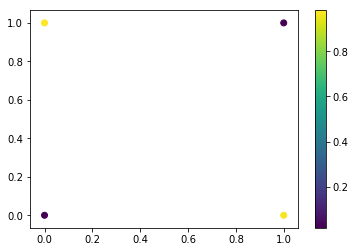

In [52]:
import tensorflow as tf
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")

Theta1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="Theta1")
Theta2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="Theta2")

Bias1 = tf.Variable(tf.zeros([2]), name="Bias1")
Bias2 = tf.Variable(tf.zeros([1]), name="Bias2")

A2 = tf.sigmoid(tf.matmul(x_, Theta1) + Bias1)
Hypothesis = tf.sigmoid(tf.matmul(A2, Theta2) + Bias2)

cost = tf.reduce_mean(( (y_ * tf.log(Hypothesis)) + 
        ((1 - y_) * tf.log(1.0 - Hypothesis)) ) * -1)

#train_step1 = tf.train.Optimizer()
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    #sess = tf.Session()
    sess.run(init)
    for i in range(100000):
        sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
        if i % 10000 == 0:
            print('Epoch ', i)
            pred = sess.run(Hypothesis, feed_dict={x_: XOR_X, y_: XOR_Y})
            print('Predictions ', pred)
            #print('Theta1 ', sess.run(Theta1))
            #print('Bias1 ', sess.run(Bias1))
            #print('Theta2 ', sess.run(Theta2))
            #print('Bias2 ', sess.run(Bias2))
            #print('cost ', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
    inputdata = np.array([[0,0],[0,1],[1,0],[1,1]])
    xx, yy = inputdata.T
#image = plt.imshow(pred, interpolation='none',
                       #extent = [0, 1.0, 0, 1.0])
                       #aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    plt.scatter(xx, yy, c = pred)
    plt.colorbar()
    plt.show()        

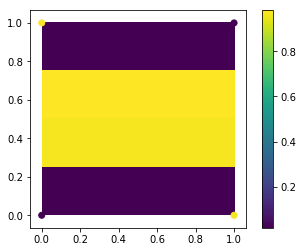

In [57]:
inputdata = np.array([[0,0],[0,1],[1,0],[1,1]])
xx, yy = inputdata.T
image = plt.imshow(pred, interpolation='none',
                       extent = [0, 1.0, 0, 1.0])
                       #aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
plt.scatter(xx, yy, c = pred)
plt.colorbar()
plt.show()

Ahm... the purple bit should be vertical...

# 2) XOR: FeedForward Neural Network now with one hidden layer, which has several hidden units in this layer

In [96]:
import numpy as np
import tensorflow as tf

sess = tf.InteractiveSession()

inputs = tf.placeholder(tf.float32, shape=[None, 2])
outputs = tf.placeholder(tf.float32, shape=[None, 1])

# [!] define the number of hidden units in the first layer
HIDDEN_UNITS = 3 

# connect 2 inputs to 3 hidden units
# Initialize weights with random numbers, to make the network learn
weights_1 = tf.Variable(tf.truncated_normal([2, HIDDEN_UNITS]))
biases_1 = tf.Variable(tf.zeros([HIDDEN_UNITS]))

# connect 2 inputs to every hidden unit. Add bias
layer_1_outputs = tf.nn.sigmoid(tf.matmul(inputs, weights_1) + biases_1)
weights_2 = tf.Variable(tf.truncated_normal([HIDDEN_UNITS, 2]))
biases_2 = tf.Variable(tf.zeros([2]))

layer_2_outputs = tf.nn.sigmoid(tf.matmul(layer_1_outputs, weights_2) + biases_2)


weights_3 = tf.Variable(tf.truncated_normal([2, 1]))
biases_3 = tf.Variable(tf.zeros([1]))

logits = tf.nn.sigmoid(tf.matmul(layer_2_outputs, weights_3) + biases_3)

# [!] The error function chosen is good for a multiclass classification taks, not for a XOR.
error_function = 0.5 * tf.reduce_sum(tf.subtract(logits, outputs) 
                                     * tf.subtract(logits, outputs))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(error_function)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


training_inputs = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]

training_outputs = [[0.0], [1.0], [1.0], [0.0]]

for i in range(1000000):
    _, loss = sess.run([train_step, error_function],
                       feed_dict={inputs: np.array(training_inputs),
                                  outputs: np.array(training_outputs)})
    #print(loss)

print(sess.run(logits, feed_dict={inputs: np.array([[0.0, 0.0]])}))
print(sess.run(logits, feed_dict={inputs: np.array([[0.0, 1.0]])}))
print(sess.run(logits, feed_dict={inputs: np.array([[1.0, 0.0]])}))
print(sess.run(logits, feed_dict={inputs: np.array([[1.0, 1.0]])}))



[[ 0.0044068]]
[[ 0.99392939]]
[[ 0.99407518]]
[[ 0.00801899]]


--------------------------------------------------------------------------

# *****Below is a graph that I found on line that really want to plot something similar for the XOR predictions I've done above. Still haven't figure out how to do it...

This example illustrates GPC on XOR data. Compared are a stationary, isotropic kernel (RBF:Radial basis function) and a non-stationary kernel (DotProduct). 

Automatically created module for IPython interactive environment


//anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:391: RuntimeWarning: overflow encountered in exp
  pi = 1 / (1 + np.exp(-f))


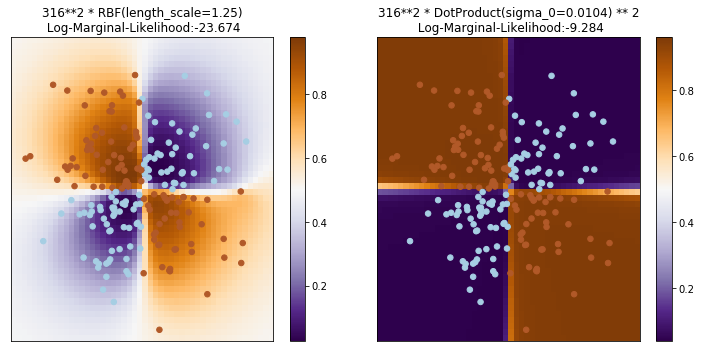

In [102]:
print(__doc__)

# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct


xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.0), 1.0 * DotProduct(sigma_0=1.0)**2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title("%s\n Log-Marginal-Likelihood:%.3f"
              % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
              fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# The most intuitive way to label a dataset "X"
# (list of features, where X[i] are the features for a datapoint i)
# is to have a flat list "labels" where labels[i] is the label for datapoint i.
labels = [0, 1, 1, 1, 0, 0, 1]

# The OneHotEncoder transforms those labels to something our models can
# work with
enc = OneHotEncoder()


def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)

labels_r = trans_for_ohe(labels)
# The encoder has to know how many classes there are and what their names are.
enc.fit(labels_r)

# Now you can transform
print(enc.transform(trans_for_ohe([0, 1])).toarray().tolist())

[[1.0, 0.0], [0.0, 1.0]]


--------------------------------------------------------------------------

# Don't want to focus more on the XOR, prob better carry on quickly with credit card data. But To do list for XOR: 
- Try Random Forest: Use tensor forest
- SVM with TensorFlow: currently tensorflow only support linear optimizer

In [11]:
from tensorflow.contrib import learn
from tensorflow.contrib.linear_optimizer.python import sdca_optimizer

In [112]:
from tensorflow.contrib import tensor_forest



In [6]:
import math
import tensorflow as tf
import numpy as np

HIDDEN_NODES = 10

x = tf.placeholder(tf.float32, [None, 2])
W_hidden = tf.Variable(tf.truncated_normal([2, HIDDEN_NODES], stddev=1./math.sqrt(2)))
b_hidden = tf.Variable(tf.zeros([HIDDEN_NODES]))
hidden = tf.nn.relu(tf.matmul(x, W_hidden) + b_hidden)

W_logits = tf.Variable(tf.truncated_normal([HIDDEN_NODES, 2], stddev=1./math.sqrt(HIDDEN_NODES)))
b_logits = tf.Variable(tf.zeros([2]))
logits = tf.matmul(hidden, W_logits) + b_logits

y = tf.nn.softmax(logits)

y_input = tf.placeholder(tf.float32, [None, 2])

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_input)
loss = tf.reduce_mean(cross_entropy)

train_op = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

xTrain = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
yTrain = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

for i in xrange(500):
  _, loss_val = sess.run([train_op, loss], 
                         feed_dict={x: xTrain, y_input: yTrain})

  if i % 10 == 0:
    print ("Step:", i, "Current loss:", loss_val)
    for x_input in [[0, 0], [0, 1], [1, 0], [1, 1]]:
      print (x_input, sess.run(y, feed_dict={x: [x_input]}))

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

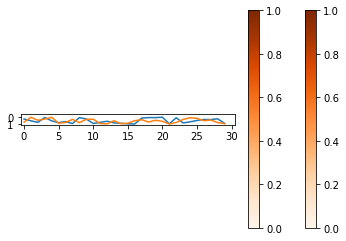

In [71]:
from matplotlib import pyplot as plt
import numpy as np

# create dummy invisible image
# (use the colormap you want to have on the colorbar)
img = plt.imshow(np.array([[0,1]]), cmap="Oranges")
img.set_visible(False)

plt.colorbar(orientation="vertical")

# add any other things you want to the figure.
plt.plot(np.random.rand(30))
plt.show()

Advanced plotting
<br>
https://python4astronomers.github.io/plotting/advanced.html

Evaluating a Classification Model
<br>
http://www.ritchieng.com/machine-learning-evaluate-classification-model/

Building Machine Learning Estimator in TensorFlow
<br>
http://terrytangyuan.github.io/2016/07/08/understand-and-build-tensorflow-estimator/

XOR problem video lecture
<br>
https://stackskills.com/courses/deep-learning-prerequisites-logistic-regression-in-python/lectures/1541672